In [1]:
pip install holidays-es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from math import pi, sin, cos
from datetime import datetime
from holidays_es import get_provinces, Province
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
df = pd.read_csv('station_1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          25862 non-null  int64  
 1   activate            25862 non-null  int64  
 2   name                25862 non-null  object 
 3   reservations_count  25862 non-null  int64  
 4   light               25862 non-null  int64  
 5   total_bases         25862 non-null  int64  
 6   free_bases          25862 non-null  int64  
 7   number              25862 non-null  object 
 8   longitude           25862 non-null  float64
 9   no_available        25862 non-null  int64  
 10  address             25862 non-null  object 
 11  latitude            25862 non-null  float64
 12  dock_bikes          25862 non-null  int64  
 13  id                  25862 non-null  object 
 14  time                25862 non-null  int64  
 15  date                25862 non-null  object 
 16  holi

In [5]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [6]:
df.year.unique()

array([2018, 2019, 2020, 2021])

In [7]:
temp = df.copy()

In [23]:
# Create correlation matrix
#corr_matrix = temp.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [23]:
#to_drop 

In [25]:
#temp_2=temp[to_drop]

In [26]:
#corr_matrix = temp_2.corr().abs()

In [35]:
#corr_mat = temp.corr()

In [36]:
#sorted_mat = corr_mat.unstack().sort_values()

In [39]:
#sorted_corr = pd.DataFrame(sorted_mat)

In [27]:
#sorted_corr

In [26]:
#sns.heatmap(corr_matrix)

In [8]:
temp.shape

(25862, 28)

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activate            25862 non-null  int64  
 1   name                25862 non-null  object 
 2   reservations_count  25862 non-null  int64  
 3   light               25862 non-null  int64  
 4   total_bases         25862 non-null  int64  
 5   free_bases          25862 non-null  int64  
 6   number              25862 non-null  object 
 7   longitude           25862 non-null  float64
 8   no_available        25862 non-null  int64  
 9   address             25862 non-null  object 
 10  latitude            25862 non-null  float64
 11  dock_bikes          25862 non-null  int64  
 12  id                  25862 non-null  object 
 13  time                25862 non-null  int64  
 14  date                25862 non-null  object 
 15  holidays            25862 non-null  bool   
 16  date

In [63]:
#test=temp['datetime'][0]

In [30]:
#test[0:10]+' '+test[10:]

In [32]:
#temp['datetime']

0         2018-08-01  0:00:00
1         2018-08-01  1:00:00
2         2018-08-01  2:00:00
3         2018-08-01  3:00:00
4         2018-08-01  4:00:00
                 ...         
25857    2021-06-30  19:00:00
25858    2021-06-30  20:00:00
25859    2021-06-30  21:00:00
25860    2021-06-30  22:00:00
25861    2021-06-30  23:00:00
Name: datetime, Length: 25862, dtype: object

In [34]:
#pd.to_datetime(temp['datetime'], format='%Y-%m-%d %H:%M:%S',)

ValueError: ignored

### Scaling and Encoding :

In [10]:
temp.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,...,weather_main,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,1,Puerta del Sol A,0,2,24,11,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.000000,1.000000,0.974928,-0.222521,1.0,6.123234e-17
1,1,Puerta del Sol A,0,0,24,18,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.258819,0.965926,0.974928,-0.222521,1.0,6.123234e-17
2,1,Puerta del Sol A,0,2,24,13,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.500000,0.866025,0.974928,-0.222521,1.0,6.123234e-17
3,1,Puerta del Sol A,0,0,24,17,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.707107,0.707107,0.974928,-0.222521,1.0,6.123234e-17
4,1,Puerta del Sol A,0,0,24,22,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.866025,0.500000,0.974928,-0.222521,1.0,6.123234e-17


In [11]:
temp.select_dtypes(['int', 'float']).columns

Index(['activate', 'reservations_count', 'light', 'total_bases', 'free_bases',
       'longitude', 'no_available', 'latitude', 'dock_bikes', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler

f_transformer = StandardScaler()

temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos','weekday_sin', 'weekday_cos', 'month_sin', 
      'month_cos']] = f_transformer.fit_transform(temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos',
        'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']])


In [13]:
temp.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'longitude', 'no_available', 'address',
       'latitude', 'dock_bikes', 'id', 'time', 'date', 'holidays', 'datetime',
       'feels_like', 'weather_main', 'weekday', 'year', 'month', 'hour_sin',
       'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [14]:
temp.holidays = temp.holidays.astype('int')

In [15]:
temp_model = temp.drop(columns=['name', 'number', 'address', 'id'])

In [16]:
temp_model.head()

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,Clear,2,2018,8,-0.001459,1.413281,1.379811,-0.315715,1.4689,0.031981
1,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,Clear,2,2018,8,0.364336,1.365063,1.379811,-0.315715,1.4689,0.031981
2,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,Clear,2,2018,8,0.705203,1.223693,1.379811,-0.315715,1.4689,0.031981
3,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,Clear,2,2018,8,0.997912,0.998806,1.379811,-0.315715,1.4689,0.031981
4,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,Clear,2,2018,8,1.222516,0.705727,1.379811,-0.315715,1.4689,0.031981


In [18]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = ['year', 'month', 'weekday', 'weather_main']
transformed_data = pd.DataFrame(ohe.fit_transform(temp_model[categorical_features]))
transformed_data.columns = ohe.get_feature_names(categorical_features)
concatenated_data = pd.concat([temp_model, transformed_data], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# categorical_features = ['year', 'month', 'weekday', 'weather_main']
# ohe.fit(temp_model[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [117]:
# encoded = ohe.transform(temp_model[categorical_features])

In [ ]:
# temp_model['year'], temp_model['month'], temp_model['weekday'], temp_model['weather_main'] = encoded.T

In [20]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25862 non-null  float64
 1   reservations_count         25862 non-null  float64
 2   light                      25862 non-null  float64
 3   total_bases                25862 non-null  float64
 4   free_bases                 25862 non-null  float64
 5   longitude                  25862 non-null  float64
 6   no_available               25862 non-null  float64
 7   latitude                   25862 non-null  float64
 8   dock_bikes                 25862 non-null  int64  
 9   time                       25862 non-null  float64
 10  date                       25862 non-null  object 
 11  holidays                   25862 non-null  int64  
 12  datetime                   25862 non-null  object 
 13  feels_like                 25862 non-null  flo

In [52]:
temp_model = concatenated_data.drop(columns=['year', 'month', 'weekday', 'weather_main','date'])

In [54]:
temp_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25862 non-null  float64
 1   reservations_count         25862 non-null  float64
 2   light                      25862 non-null  float64
 3   total_bases                25862 non-null  float64
 4   free_bases                 25862 non-null  float64
 5   longitude                  25862 non-null  float64
 6   no_available               25862 non-null  float64
 7   latitude                   25862 non-null  float64
 8   dock_bikes                 25862 non-null  int64  
 9   time                       25862 non-null  float64
 10  holidays                   25862 non-null  int64  
 11  datetime                   25862 non-null  object 
 12  feels_like                 25862 non-null  float64
 13  hour_sin                   25862 non-null  flo

In [55]:
temp_model['datetime'] = temp_model['datetime'].apply(lambda x: x[0:10]+' '+x[10:]+':00')

In [56]:
temp_model['datetime']=pd.to_datetime(temp_model['datetime'], format='%Y-%m-%d %H:%M:%S')

In [57]:
temp_model = temp_model.set_index('datetime')

In [58]:
temp_model.sort_values(by='datetime')

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 01:00:00,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 02:00:00,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 03:00:00,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 04:00:00,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,0.0,3.789224,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,3,1.083109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 20:00:00,0.0,-0.218666,-1.195028,0.916760,1.089502,0.861520,-0.352407,1.047365,3,1.227475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 21:00:00,0.0,-0.218666,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,4,1.371841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
temp_model

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 01:00:00,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 02:00:00,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 03:00:00,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 04:00:00,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,0.0,3.789224,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,3,1.083109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 20:00:00,0.0,-0.218666,-1.195028,0.916760,1.089502,0.861520,-0.352407,1.047365,3,1.227475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 21:00:00,0.0,-0.218666,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,4,1.371841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating Time steps

In [61]:
temp_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25862 entries, 2018-08-01 00:00:00 to 2021-06-30 23:00:00
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25862 non-null  float64
 1   reservations_count         25862 non-null  float64
 2   light                      25862 non-null  float64
 3   total_bases                25862 non-null  float64
 4   free_bases                 25862 non-null  float64
 5   longitude                  25862 non-null  float64
 6   no_available               25862 non-null  float64
 7   latitude                   25862 non-null  float64
 8   dock_bikes                 25862 non-null  int64  
 9   time                       25862 non-null  float64
 10  holidays                   25862 non-null  int64  
 11  feels_like                 25862 non-null  float64
 12  hour_sin                   25862 non-null  float64
 13  hour_cos   

In [62]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [63]:
train_size = int(len(temp_model) * 0.8)
test_size = len(temp_model) - train_size
train, test = temp_model.iloc[0:train_size], temp_model.iloc[train_size:len(temp_model)]
print(len(train), len(test))

20689 5173


In [64]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.dock_bikes, time_steps)
X_test, y_test = create_dataset(test, test.dock_bikes, time_steps)

print(X_train.shape, y_train.shape)

(20665, 24, 52) (20665,)


Model 1: 

In [72]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [74]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/20
323/323 [==============================] - 21s 55ms/step - loss: 17.1678 - val_loss: 6.5818
Epoch 2/20
323/323 [==============================] - 18s 57ms/step - loss: 8.2925 - val_loss: 5.7508
Epoch 3/20
323/323 [==============================] - 17s 53ms/step - loss: 7.9952 - val_loss: 5.7140
Epoch 4/20
323/323 [==============================] - 17s 53ms/step - loss: 7.7023 - val_loss: 5.7460
Epoch 5/20
323/323 [==============================] - 18s 55ms/step - loss: 7.5640 - val_loss: 5.6263
Epoch 6/20
323/323 [==============================] - 17s 53ms/step - loss: 7.4502 - val_loss: 5.5635
Epoch 7/20
323/323 [==============================] - 17s 53ms/step - loss: 7.4012 - val_loss: 5.6826
Epoch 8/20
323/323 [==============================] - 17s 53ms/step - loss: 7.2319 - val_loss: 5.2700
Epoch 9/20
323/323 [==============================] - 17s 53ms/step - loss: 7.2457 - val_loss: 5.1989
Epoch 10/20
323/323 [==============================] - 17s 53ms/step - loss: 7.04

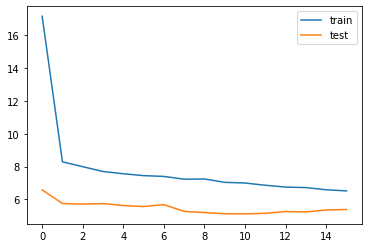

In [75]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Model 2:

In [76]:
model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(layers.LSTM(units= 128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units= 128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])


In [77]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [78]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/20
323/323 [==============================] - 54s 149ms/step - loss: 20.7602 - acc: 0.1397 - val_loss: 9.6963 - val_acc: 0.0157
Epoch 2/20
323/323 [==============================] - 47s 146ms/step - loss: 9.4755 - acc: 0.1452 - val_loss: 7.2227 - val_acc: 0.0157
Epoch 3/20
323/323 [==============================] - 48s 148ms/step - loss: 8.4376 - acc: 0.1535 - val_loss: 7.2432 - val_acc: 0.0171
Epoch 4/20
323/323 [==============================] - 47s 145ms/step - loss: 8.1028 - acc: 0.1624 - val_loss: 8.6383 - val_acc: 0.0183
Epoch 5/20
323/323 [==============================] - 47s 147ms/step - loss: 8.0565 - acc: 0.1631 - val_loss: 8.7338 - val_acc: 0.0171
Epoch 6/20
323/323 [==============================] - 48s 149ms/step - loss: 7.8690 - acc: 0.1645 - val_loss: 7.0122 - val_acc: 0.0185
Epoch 7/20
323/323 [==============================] - 47s 146ms/step - loss: 7.6854 - acc: 0.1654 - val_loss: 6.4158 - val_acc: 0.0169
Epoch 8/20
323/323 [==============================] - 

In [79]:
## MODEL 3

In [80]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh",return_sequences = True))
regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"]) #rmspr


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 10)

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

In [82]:
### MODEL 4

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import RMSprop


def create_model(X_train, y_train):
    
    
    print(X_train.shape)
    print(y_train.shape)
    
    #tf.random.set_seed(30)
    normalizer = Normalization() # Instantiate a "normalizer" layer
    normalizer.adapt(X_train) # "Fit" it on the train set
    model = Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(25, return_sequences=False, input_shape=(X_train.shape[1],X_train.shape[2])))

    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(y_train.shape[-1], activation='linear'))
    model.compile(loss='mse',optimizer=RMSprop(learning_rate=0.01), metrics=['mae', 'mape'])
    print(model.summary())
    print(X_train.shape)

    return model


In [ ]:
create_model(X_train, y_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 5s 54ms/step


(array([  0.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0.,   0.]),
 array([ 9.688438,  9.788439,  9.888438,  9.988439, 10.088438, 10.188438,
        10.288439, 10.388438, 10.488439, 10.588438, 10.688438],
       dtype=float32),
 <BarContainer object of 10 artists>)

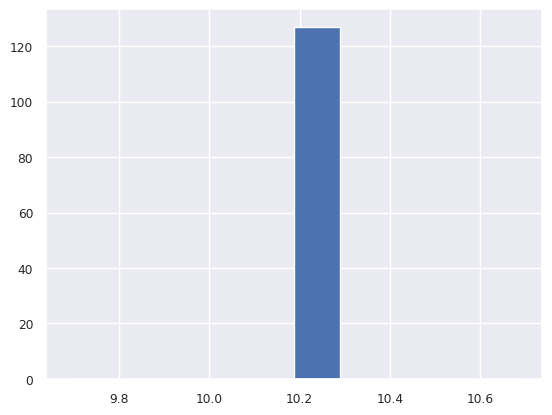

In [ ]:
plt.hist(y_pred)